# Below is a dataset of ecommerce data. I'm tasked with identifying areas of opportunity to increase revenue in our sales funnel and the findings are to be reported to a non-technical audience.

## A few of the metrics and trends I investigated were the breakdown of sales by:
1) country
2) gender
3) category of item purchased
4) age
5) campaign that the customer responded to
6) returns
7) trends in our overall sales broken down by month and year

In [1]:
#import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import warnings

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#read in the dataset
df = pd.read_csv('Customer360Insights.csv')

In [3]:
df.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,electronics,table fan,30,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,fashion,dress,50,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,NaN
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,toys,plush toy,12,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,NaN
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,toys,plush toy,12,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,NaN
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,fashion,shoes,60,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SessionStart           2000 non-null   object
 1   CustomerID             2000 non-null   int64 
 2   FullName               2000 non-null   object
 3   Gender                 2000 non-null   object
 4   Age                    2000 non-null   int64 
 5   CreditScore            2000 non-null   int64 
 6   MonthlyIncome          2000 non-null   int64 
 7   Country                2000 non-null   object
 8   State                  2000 non-null   object
 9   City                   2000 non-null   object
 10  Category               2000 non-null   object
 11  Product                2000 non-null   object
 12  Cost                   2000 non-null   int64 
 13  Price                  2000 non-null   int64 
 14  Quantity               2000 non-null   int64 
 15  CampaignSchema       

In [5]:
# Convert to datetime
df[['SessionStart', 'CartAdditionTime', 'OrderConfirmationTime', 'SessionEnd']] = \
df[['SessionStart', 'CartAdditionTime', 'OrderConfirmationTime', 'SessionEnd']].apply(pd.to_datetime)

In [6]:
# Extract the month from datetime columns and add new columns
df[['SessionStart_Month', 'CartAdditionTime_Month', 'OrderConfirmationTime_Month', 'SessionEnd_Month']] = \
df[['SessionStart', 'CartAdditionTime', 'OrderConfirmationTime', 'SessionEnd']].apply(lambda x: x.dt.month)

In [7]:
# Extract the year from datetime columns and add new columns
df[['SessionStart_Year', 'CartAdditionTime_Year', 'OrderConfirmationTime_Year', 'SessionEnd_Year']] = \
df[['SessionStart', 'CartAdditionTime', 'OrderConfirmationTime', 'SessionEnd']].apply(lambda x: x.dt.year)

In [8]:
# Extract year and month together
df['OrderConfirmationTime_YearMonth'] = df['OrderConfirmationTime'].dt.to_period('M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SessionStart                     2000 non-null   datetime64[ns]
 1   CustomerID                       2000 non-null   int64         
 2   FullName                         2000 non-null   object        
 3   Gender                           2000 non-null   object        
 4   Age                              2000 non-null   int64         
 5   CreditScore                      2000 non-null   int64         
 6   MonthlyIncome                    2000 non-null   int64         
 7   Country                          2000 non-null   object        
 8   State                            2000 non-null   object        
 9   City                             2000 non-null   object        
 10  Category                         2000 non-null   object     

In [10]:
df.describe()

,SessionStart,CustomerID,Age,CreditScore,MonthlyIncome,Cost,Price,Quantity,CartAdditionTime,OrderConfirmationTime,SessionEnd,SessionStart_Month,CartAdditionTime_Month,OrderConfirmationTime_Month,SessionEnd_Month,SessionStart_Year,CartAdditionTime_Year,OrderConfirmationTime_Year,SessionEnd_Year
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,1700,2000,2000.000000,2000.000000,1700.000000,2000.000000,2000.000000,2000.000000,1700.000000,2000.000000
mean,2021-07-11 09:31:36.119999744,1609.064000,44.487500,690.126500,5589.697000,135.816000,210.921500,3.527500,2021-07-11 09:49:08.879999744,2021-07-12 16:58:24.741176320,2021-07-11 09:52:40.680000,6.545500,6.545500,6.584706,6.545500,2021.023000,2021.023000,2021.023529,2021.023000
min,2019-01-01 02:42:00,1001.000000,18.000000,600.000000,3001.000000,5.000000,8.000000,1.000000,2019-01-01 02:49:00,2019-01-01 03:02:00,2019-01-01 02:53:00,1.000000,1.000000,1.000000,1.000000,2019.000000,2019.000000,2019.000000,2019.000000
25%,2020-05-10 08:54:45,1311.000000,31.000000,646.000000,4403.500000,15.000000,25.000000,2.000000,2020-05-10 09:10:15,2020-05-13 06:41:45,2020-05-10 09:12:15,4.000000,4.000000,4.000000,4.000000,2020.000000,2020.000000,2020.000000,2020.000000
50%,2021-07-07 08:49:00,1610.000000,44.000000,691.000000,5656.500000,30.000000,50.000000,3.000000,2021-07-07 09:13:00,2021-07-09 16:26:30,2021-07-07 09:15:30,7.000000,7.000000,7.000000,7.000000,2021.000000,2021.000000,2021.000000,2021.000000
75%,2022-10-01 23:47:30,1915.250000,59.000000,732.000000,6856.250000,60.000000,100.000000,5.000000,2022-10-01 23:58:30,2022-10-05 18:58:30,2022-10-02 00:00:30,9.000000,9.000000,9.000000,9.000000,2022.000000,2022.000000,2022.000000,2022.000000
max,2023-12-31 08:01:00,2200.000000,72.000000,780.000000,7999.000000,1000.000000,1500.000000,6.000000,2023-12-31 08:24:00,2023-12-31 08:30:00,2023-12-31 08:28:00,12.000000,12.000000,12.000000,12.000000,2023.000000,2023.000000,2023.000000,2023.000000
std,NaN,349.835233,16.350367,50.618066,1441.584931,261.935533,394.196811,1.697847,NaN,NaN,NaN,3.412001,3.412001,3.421086,3.412001,1.388681,1.388681,1.383723,1.388681


In [11]:
df['Age'].value_counts()

Age
69    57
36    56
66    55
33    55
21    54
25    52
37    49
68    49
19    48
22    48
23    45
44    44
71    43
43    41
41    41
56    41
38    40
35    40
55    40
48    39
47    39
59    39
20    39
64    38
24    37
27    37
72    37
58    37
34    35
31    35
63    35
42    35
40    33
18    33
67    32
49    32
57    32
65    31
54    31
62    29
45    28
53    27
60    26
50    26
30    26
51    25
32    25
61    24
46    24
26    24
29    24
39    24
28    23
52    22
70    19
Name: count, dtype: int64

In [12]:
df['CreditScore'].value_counts()

CreditScore
655    27
673    26
724    25
727    23
694    22
       ..
716     4
684     3
717     3
749     3
647     1
Name: count, Length: 180, dtype: int64

In [13]:
df['Country'].value_counts()

Country
Canada       258
India        247
Australia    242
China        230
Italy        222
Spain        219
Japan        198
USA          193
UK           191
Name: count, dtype: int64

In [14]:
df['Category'].value_counts()

Category
home appliances    423
toys               412
books              406
fashion            398
electronics        361
Name: count, dtype: int64

In [15]:
df['Product'].value_counts()

Product
action figure     118
shoes             116
microwave oven    116
magazine          113
puzzle            111
toaster           109
board game        109
jeans             107
television        106
autobiography     106
mixer grinder     103
textbook           99
electric stove     95
hair dryer         93
dress              92
novel              88
table fan          84
t-shirt            83
laptop             78
plush toy          74
Name: count, dtype: int64

In [16]:
df['CampaignSchema']=df['CampaignSchema ']

In [17]:
df['CampaignSchema'].value_counts()

CampaignSchema
Instagram-ads        361
Google-ads           345
Facebook-ads         338
E-mails              331
Billboard-QR code    317
Twitter-ads          308
Name: count, dtype: int64

In [18]:
df['ReturnReason'].value_counts()

ReturnReason
Poor Value         55
Wrong Item         49
Arrived Late       47
Arrived Damaged    45
Poor Quality       40
Name: count, dtype: int64

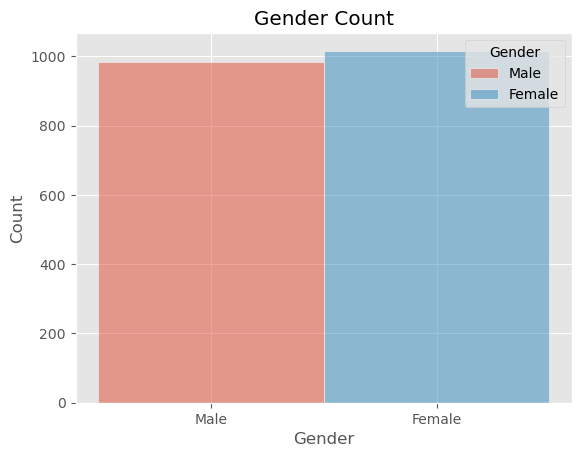

In [19]:
# Count by Gender (Insight #1)
gender_count = sns.histplot(x='Gender', data=df, hue='Gender')
gender_count = plt.xlabel('Gender')
gender_count = plt.ylabel('Count')
gender_count = plt.title('Gender Count')

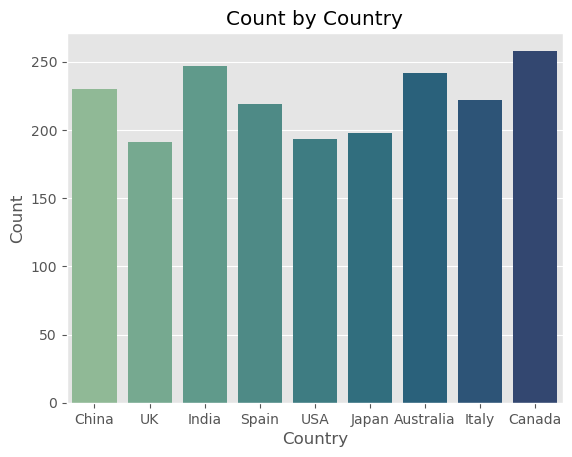

In [20]:
# Count by Country (Insight #1)
country_count = sns.countplot(x='Country', data=df, palette='crest')
country_count = plt.xlabel('Country')
country_count = plt.ylabel('Count')
country_count = plt.title('Count by Country')

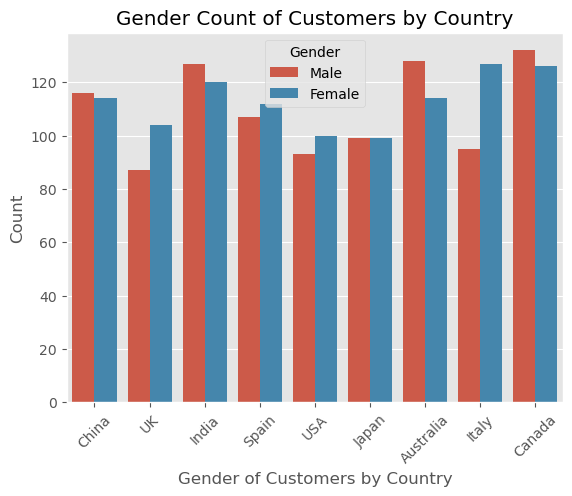

In [21]:
# Gender Count of Customers by Country (Insight #1)
g_c_count = sns.countplot(x='Country', data=df, hue='Gender')
g_c_count = plt.xlabel('Gender of Customers by Country')
g_c_count = plt.xticks(rotation=45)
g_c_count = plt.ylabel('Count')
g_c_count = plt.title('Gender Count of Customers by Country')

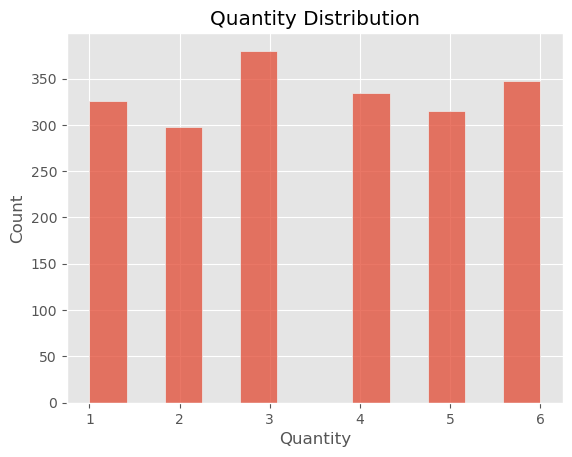

In [22]:
# Distribution of Quantity (Insight #2)
quantity_hist = sns.histplot(x='Quantity', data=df)
quantity_hist = plt.xlabel('Quantity')
quantity_hist = plt.ylabel('Count')
quantity_hist = plt.title('Quantity Distribution')

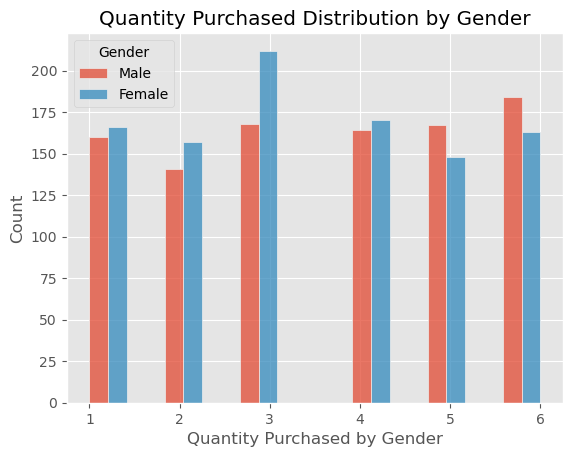

In [23]:
# Distribution of Quantity by Gender (Insight #2)
q_g_hist = sns.histplot(x='Quantity', data=df, hue ='Gender', multiple='dodge')
q_g_hist = plt.xlabel('Quantity Purchased by Gender')
q_g_hist = plt.ylabel('Count')
q_g_hist = plt.title('Quantity Purchased Distribution by Gender')

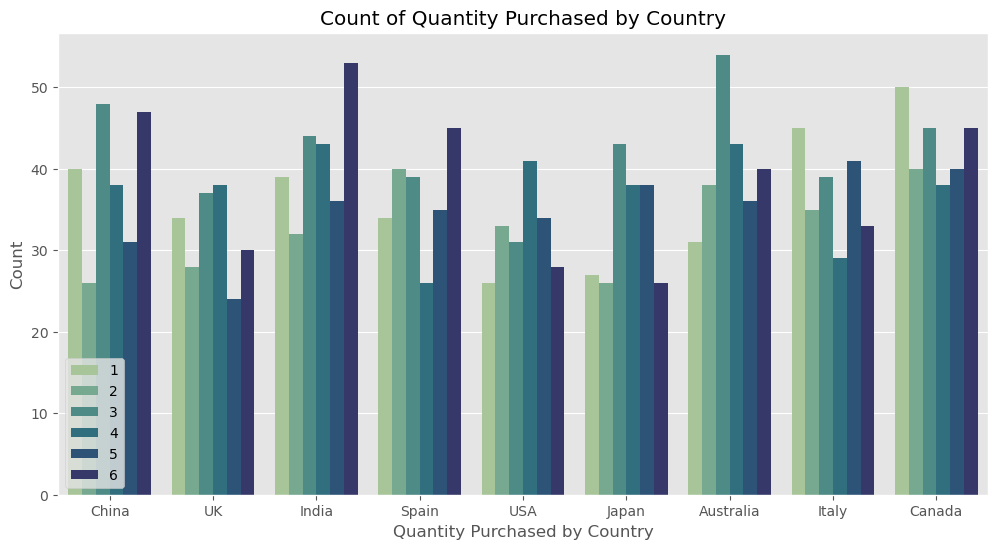

In [24]:
# Count of Quantity Purchased by Country (Insight #2)
q_p_c_count = plt.figure(figsize=(12, 6))
q_p_c_count = sns.countplot(x='Country', data=df, hue='Quantity', palette='crest')
q_p_c_count = plt.xlabel('Quantity Purchased by Country')
q_p_c_count = plt.ylabel('Count')
q_p_c_count = plt.title('Count of Quantity Purchased by Country')
q_p_c_count = plt.legend(loc='lower left')

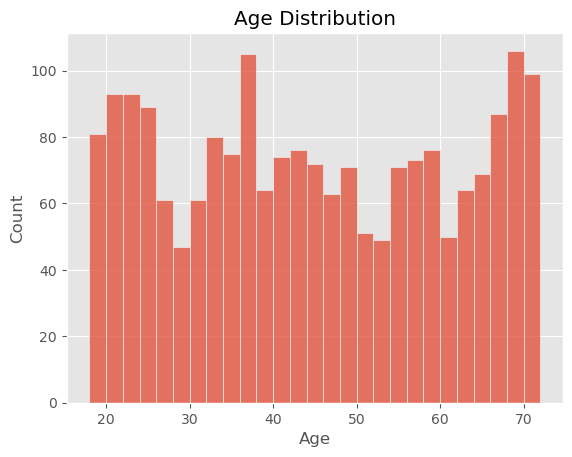

In [25]:
# Distribution of Age (Insight #3)
age_hist = sns.histplot(x='Age', data=df, bins=27)
age_hist = plt.xlabel('Age')
age_hist = plt.ylabel('Count')
age_hist = plt.title('Age Distribution')

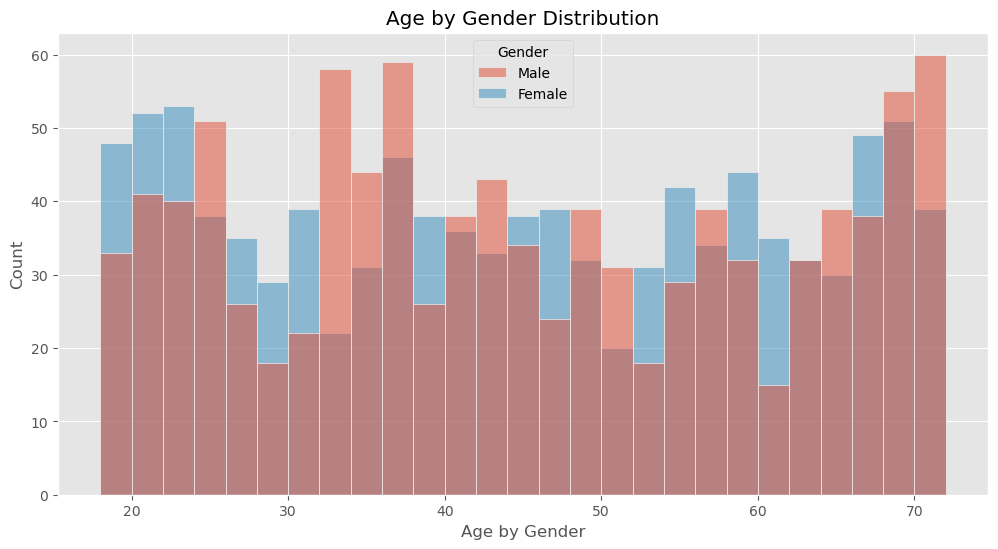

In [26]:
# Distribution of Age by Gender (Insight #3)
a_g_hist = plt.figure(figsize=(12, 6))
a_g_hist = sns.histplot(x='Age', data=df, bins=27, hue='Gender')
a_g_hist = plt.xlabel('Age by Gender')
a_g_hist = plt.ylabel('Count')
a_g_hist = plt.title('Age by Gender Distribution')

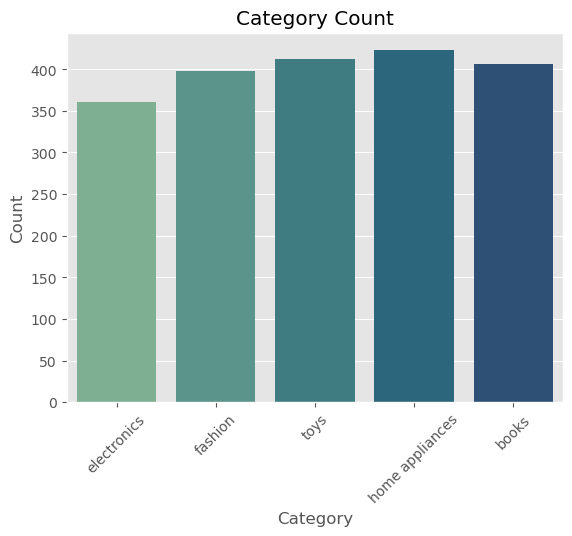

In [27]:
# Count by Category (Insight #4)
category_count = sns.countplot(x='Category', data=df, palette='crest')
category_count = plt.xlabel('Category')
category_count = plt.xticks(rotation=45)
category_count = plt.ylabel('Count')
category_count = plt.title('Category Count')

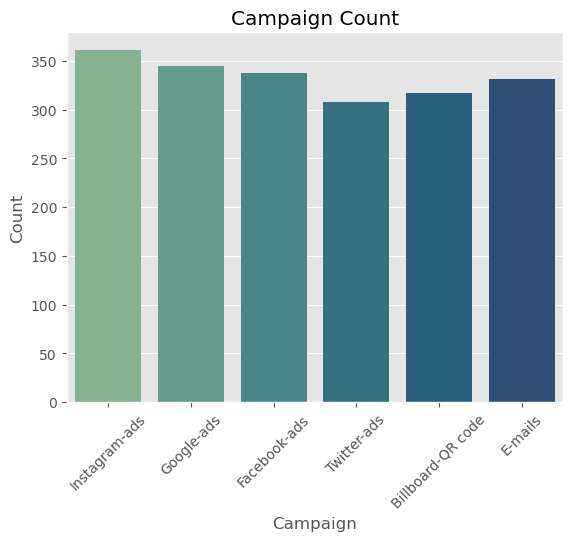

In [28]:
# Count by Campaign (Insight #4)
campaign_count = sns.countplot(x='CampaignSchema', data=df, palette='crest')
campaign_count = plt.xlabel('Campaign')
campaign_count = plt.xticks(rotation=45)
campaign_count = plt.ylabel('Count')
campaign_count = plt.title('Campaign Count')

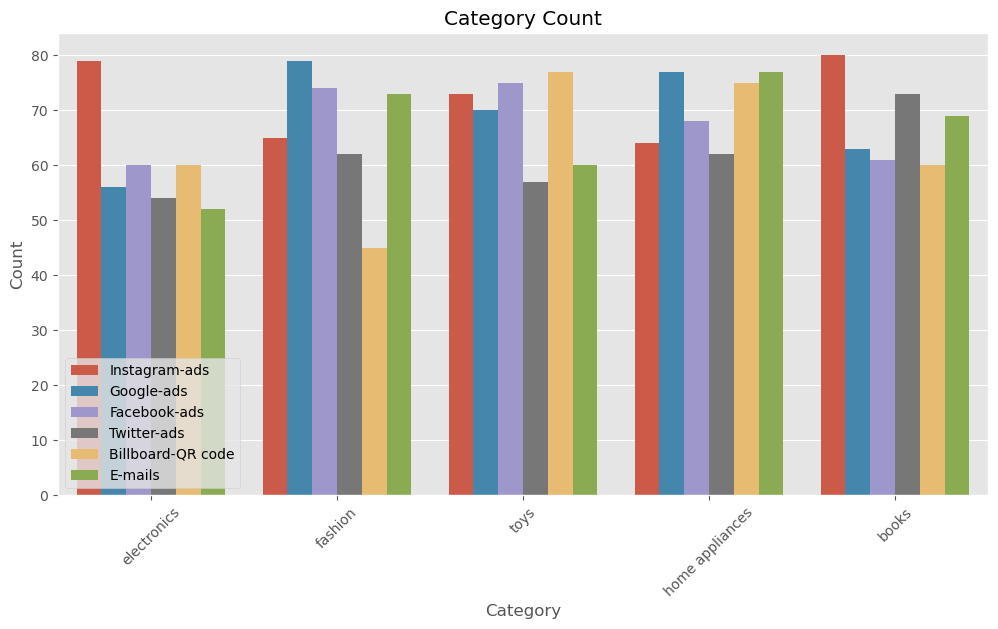

In [29]:
# Count by Category (Insight #4)
cat_camp_count = plt.figure(figsize=(12, 6))
cat_camp_count = sns.countplot(x='Category', data=df, hue='CampaignSchema')
cat_camp_count = plt.xlabel('Category')
cat_camp_count = plt.xticks(rotation=45)
cat_camp_count = plt.ylabel('Count')
cat_camp_count = plt.title('Category Count')
cat_camp_count = plt.legend(loc='lower left')

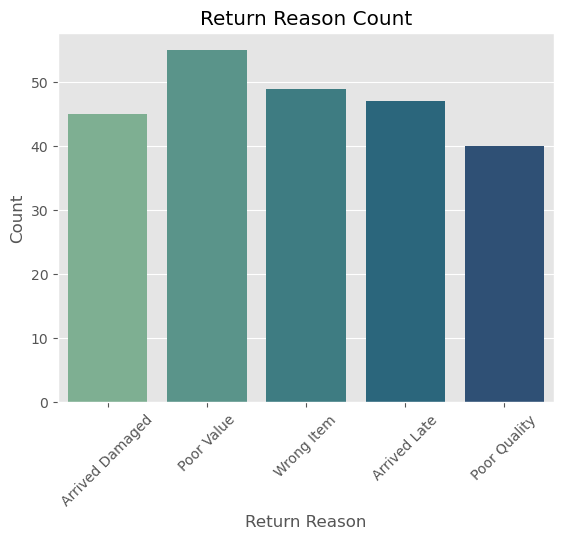

In [30]:
# Count by Return Reason (Insight #5)
rr_count = sns.countplot(x='ReturnReason', data=df, palette='crest')
rr_count = plt.xlabel('Return Reason')
rr_count = plt.xticks(rotation=45)
rr_count = plt.ylabel('Count')
rr_count = plt.title('Return Reason Count')

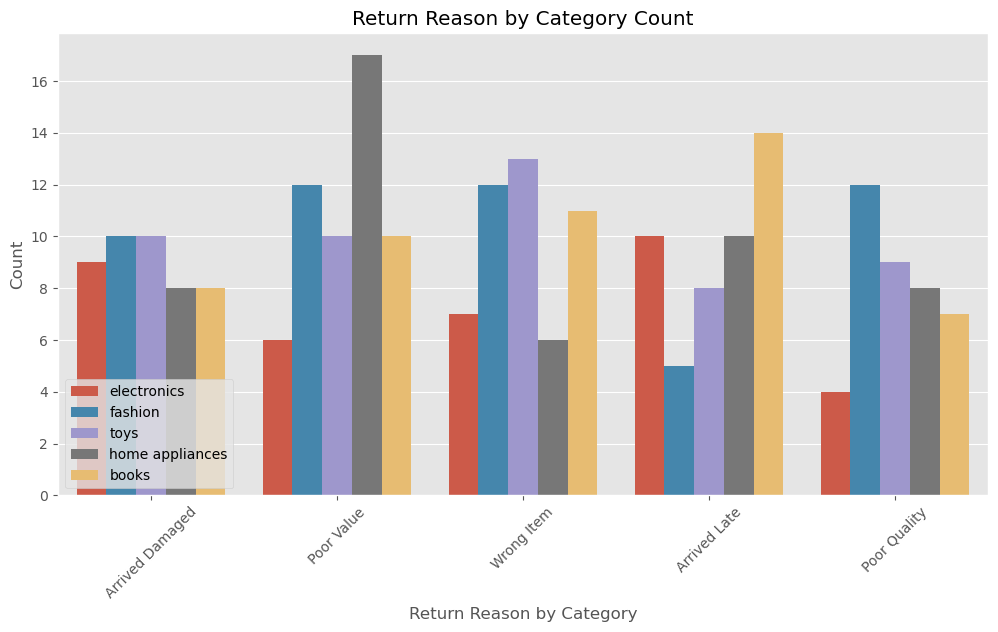

In [31]:
# Count by Return Reason by Category (Insight #5)
rr_c_count = plt.figure(figsize=(12, 6))
rr_c_count = sns.countplot(x='ReturnReason', data=df, hue='Category')
rr_c_count = plt.xlabel('Return Reason by Category')
rr_c_count = plt.xticks(rotation=45)
rr_c_count = plt.ylabel('Count')
rr_c_count = plt.title('Return Reason by Category Count')
rr_c_count = plt.legend(loc='lower left')

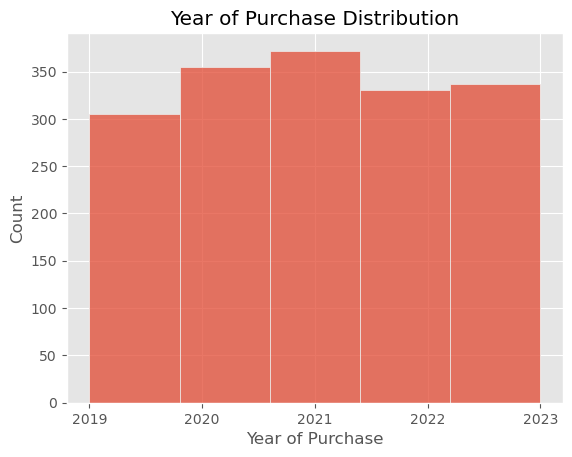

In [32]:
# Distribution of Year of Purchase
year_hist = sns.histplot(x='OrderConfirmationTime_Year', data=df, bins=5)
year_hist = plt.xlabel('Year of Purchase')
year_hist = plt.xticks([2019, 2020, 2021, 2022, 2023])
year_hist = plt.ylabel('Count')
year_hist = plt.title('Year of Purchase Distribution')

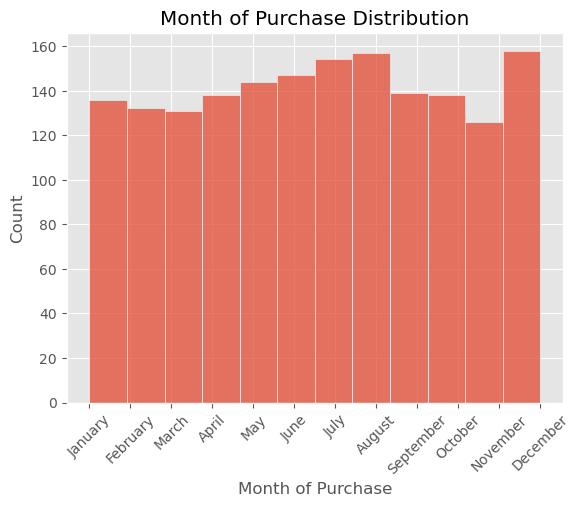

In [33]:
# Distribution of Month of Purchase
month_hist = sns.histplot(x='OrderConfirmationTime_Month', data=df, bins=12)
month_hist = plt.xlabel('Month of Purchase')
month_hist = plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                        'August', 'September', 'October', 'November', 'December'], rotation=45)
month_hist = plt.ylabel('Count')
month_hist = plt.title('Month of Purchase Distribution')

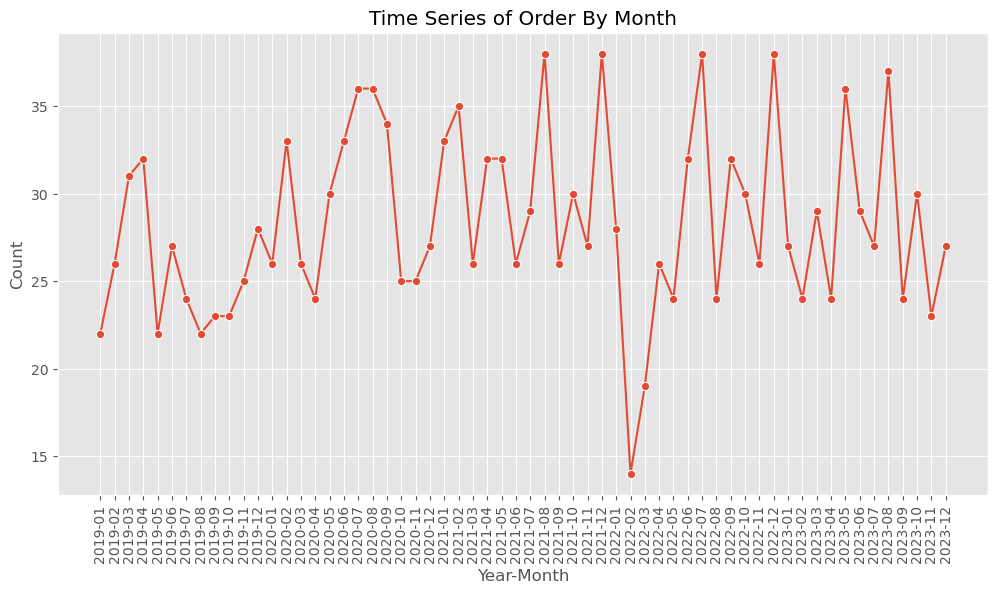

In [34]:
# Count the occurrences of each 'Year-Month'
counts = df['OrderConfirmationTime_YearMonth'].value_counts().sort_index()

# Convert counts to a DataFrame
count_df = counts.reset_index()
count_df.columns = ['OrderConfirmationTime_YearMonth', 'Count']

# Convert 'OrderConfirmationTime_YearMonth' to string for plotting
count_df['OrderConfirmationTime_YearMonth'] = count_df['OrderConfirmationTime_YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=count_df, x='OrderConfirmationTime_YearMonth', y='Count', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Time Series of Order By Month')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Conclusions
#### Overall our sales are pretty evenly split among male and female customers with slightly more female customers than male customers. This doesn't really help us, however when we dig deeper and combine with other metrics, we do see some trends that we can capitalize on.
#### Let's first get some context in regard to the countries where most of our purchases are made before expanding on our male and female customer trends. Canada, India,and Australia top the list with the most purchase. Now when we look at the number of customers per country broken out by gender, we see that in each of these three top purchasing countries,we actually have more male customers than female customers.
# Insight #1: If we are to focus on marketing more in the countries where the most purchases are made, we may want to tailor the marketing toward males in those countries, as that demographic makes more purchases there.
####  Next if we look at the quantity of items purchased per order, as it's much easier to increase revenue if you simply have the customers you have already attracted just purchase more items, we see that most orders have 3 items in them. Interestingly, when we break this down by country again, we see that our top three purchasing countries have different purchasing behavior. Canada, the country with the most orders, places more 1 item orders than any other category, while India places more 6 items orders than any other quantity, and Australia places more 3 items purchases than any other. When we also look at the gender of customers and the quantity of items in their orders, we actually find than males purchases 5 or 6 items at a higher frequency than females do, only reinforcing Insight #1 and lending more evidence for Insight #2.
# Insight #2: While we are marketing more toward males in these countries, we may want to shift the marketing in Australia, and especially Canada, to increase the item per order in those countries.
#### When analyzing the age of our customers, I found something I didn't expect in age demographics of an ecommerce platform. We see the expected highs ofcustomers in their early-mid 20's as well as another peak of customers in their mid 30's, but unexpectedly we find another peak of customers whose age is 68-72. When breaking these peaks down further, we find that the younger cohort tend to be female, while the mid 30's and 68-72 peak tend to be male.
# Insight #3: Carrying on with the theme of marketing to more male customers to increase sales given the data we have already explored, we can safely surmise that this marketing would be more effective if geared to an older audience. Any marketing targeting the 18-24 demographic would also clearly be more effective if geared toward a female audience.
#### Next we analyzed the number of purchases per category and marketing campaign. Individually, there is not a large difference between the most purchased category, home appliances, and the least purchased category, electronics or the most effective marketing campaign, Instagram ads, and the least effective marketing campaign, Twitter ads. When we look at this data together, we find more useful trends. 
# Insight #4: Instagram ads are most effective for electronics and books but not as effective for home appliances. Billboard-QR codes are most effective for toys and not nearly as effective for fashion. We can adjust these marketing campaigns to better align with their respective effectiveness to have a higher ROI on each marketing dollar spent on these campaigns.
#### Next we looked at the reason for returns to see if there is anything that can be addressed to reduce returns. Poor value was the most common reason for return while poor quality was the least common. When we dig deeper and look at return reason per category, the reason why poor value is most common is made clear. Poor value of home appliances is by far the most common return. Fashion items lead in the poor quality returns. We also see books arriving late as the second most common return overall.
# Insight #5: Here we have identified a couple areas where out products and processes can be improved. Most easily we can address the late arrival of books simply by ensuring that these orders go out on time. Fashion poor quality would need to be addressed with our suppliers and some changes may need to be made in quality control. Home appliance poor value could be a pricing or a quality issue and is something to be made aware of, but we would need more data to make a final decision on what the best course of action to address this issue would be.
#### Lastly, I thought it would be prudent to assess the overall health of our sales funnel and if we have any seasonality trends.
1) In regard to growth, we were increasing in sales from 2019-2021 then had a significant drop in sales in 2022-2023. It would be beneficial to assess why this decrease in sales occured and correct it to continue on an upward trajectory.
2) We do have somewhat of a cyclical nature to our sales as well. We see our best month in December, then a sharp drop off in January. Sales steadily rise from April-August, then we slump again in September-November.
3) Our monthly sales over time are typically in the 25-35 sales a month range with some months slightly higher or lower than that. We had 2 months, February and March of 2022, that were outliers with significantly less sales. We would want to investigate these months to see if it was internal or external factors that caused the drop to potentially avoid something like this occuring in the future.